# Recommendation for Post and User

* I will recommed user to a related posts (similar posts which like/watch by user)
* I will recommed posts to post (similar posts)
* For this tasks I will use content based and collabrtive recommendation methods. 

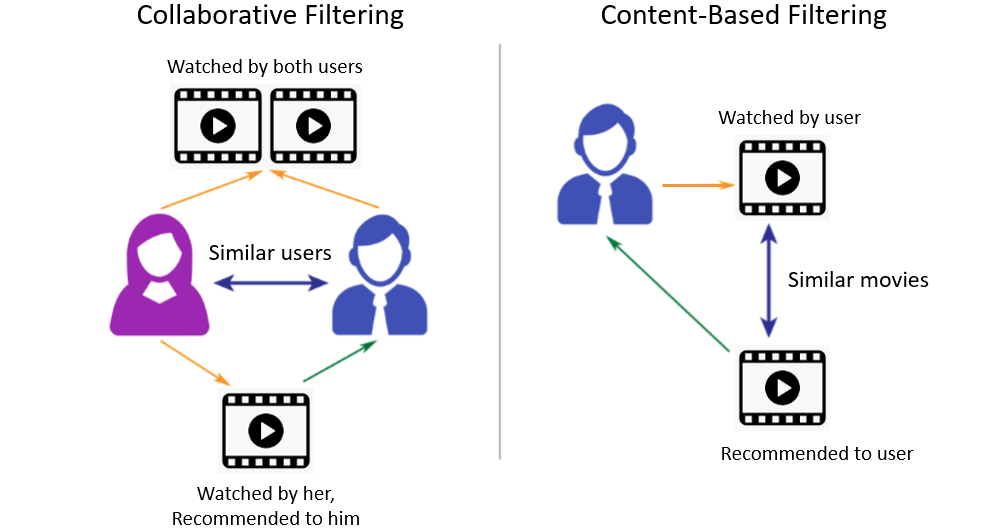

In [99]:
from IPython.display import display, Image
display(Image(filename='1.png'))

* We have three csv files, contain users and posts information.

1. User_data.csv - users details
* ID
* NAME
* GENDER
* ACADEMICS

2. Post_data.csv - posts details

* ID
* TITLE
* CATEGORY
* POST_TYPE

3. View_data - which posts watched by users

* USER_ID
* POST_ID
* TIME_STAMP



In [10]:
# import packages

import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from scipy.sparse import coo_matrix, hstack
from sklearn.preprocessing import MultiLabelBinarizer
import pickle
import warnings
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [11]:
# import datasets csv files
user_data = pd.read_csv('users.csv')
post_data = pd.read_csv('posts.csv')
view_data = pd.read_csv('views.csv')

In [12]:
user_data.head()

,_id,name,gender,academics
0,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate
1,5d610ae1653a331687083239,Gaurav Sharma,male,graduate
2,5d618359fc5fcf3bdd9a0910,Akshay Mishra,male,undergraduate
3,5d6d2bb87fa40e1417a49315,Saksham Mathur,male,undergraduate
4,5d7c994d5720533e15c3b1e9,Varun Chowhan,male,undergraduate


In [13]:
post_data.head()

,_id,title,category,post_type
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog


In [14]:
view_data.head()

,user_id,post_id,timestamp
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z


In [15]:
# shape of the datasets
print('Shape of user data', user_data.shape)
print('Shape of post data', post_data.shape)
print('Shape of view data', view_data.shape)

Shape of user data (118, 4)
Shape of post data (493, 4)
Shape of view data (1449, 3)


In [16]:
# check Null value in csv files
print('null value in user data - ')
print(user_data.isnull().any())

print('null value in post data - ')
print(post_data.isnull().any())

print('null value in view data - ')
print(user_data.isnull().any())

null value in user data - 
_id          False
name         False
gender       False
academics    False
dtype: bool
null value in post data - 
_id           False
title         False
category       True
 post_type    False
dtype: bool
null value in view data - 
_id          False
name         False
gender       False
academics    False
dtype: bool


In [17]:
# replace null value to "no category" in feature
post_data['category'] = post_data['category'].fillna('no category')

In [18]:
# check duplicates value in csv files
print('duplicate value in user data - ',user_data.duplicated().sum())
print('duplicate value in post data - ',post_data.duplicated().sum())
print('duplicate value in view data - ',view_data.duplicated().sum())

duplicate value in user data -  0
duplicate value in post data -  0
duplicate value in view data -  0


### Observation :

* we observed that, there is no duplicate values in three csv file.But found 28 NAN value in post data category feature.

* We can not remove entire roww because we have small data, so we replaced with "no category".

In [25]:
''' Below code taken from this link '''
#https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python

stopwords = (stopwords.words('english'))
def show_wordcloud(data, title = None):
    
    ''' 
    input  -- pandas dataframe, title
    output -- return pandas dataframe wordcloud 
    '''
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=1000,
        max_font_size=110, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(18,18))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

## User - Data EDA

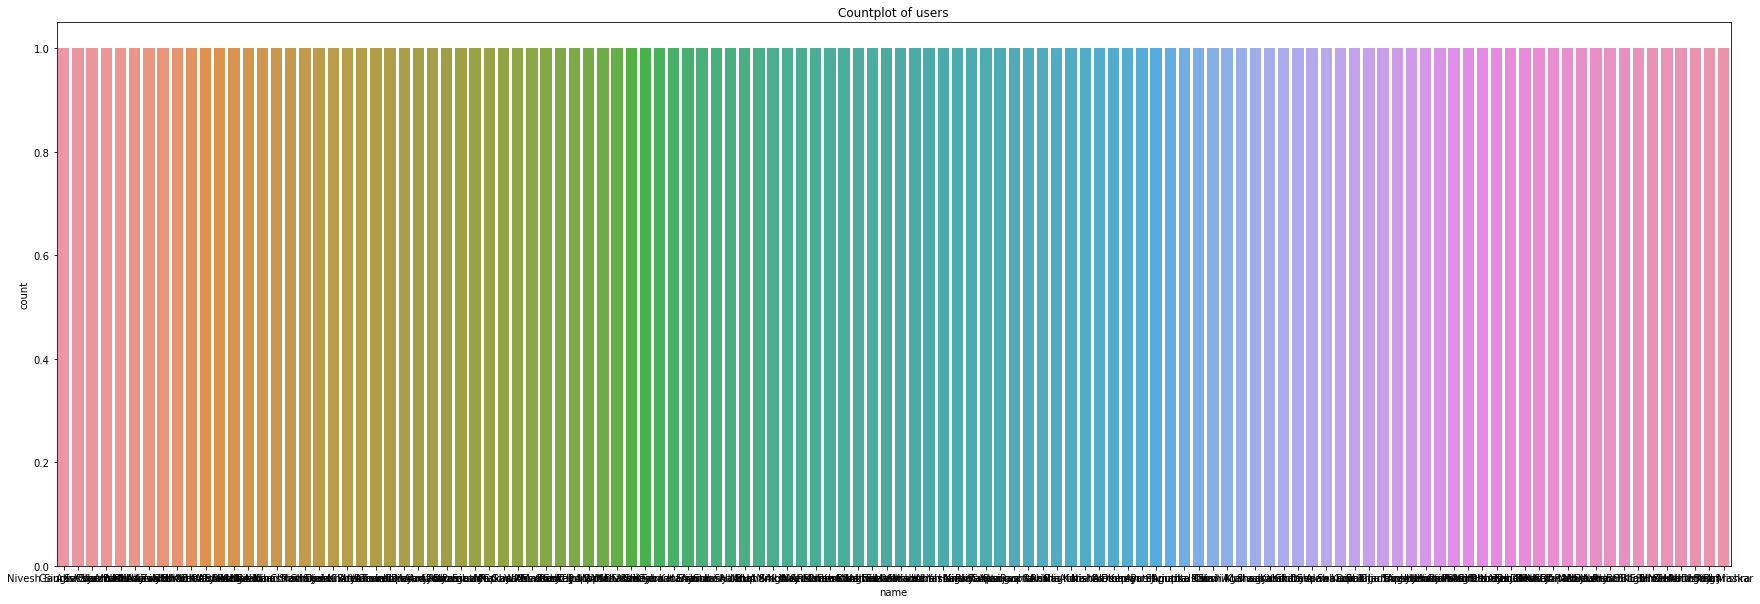

In [20]:
plt.figure(figsize=(30, 10)) 
sns.countplot(x = user_data.name)
plt.title('Countplot of users')
plt.show()

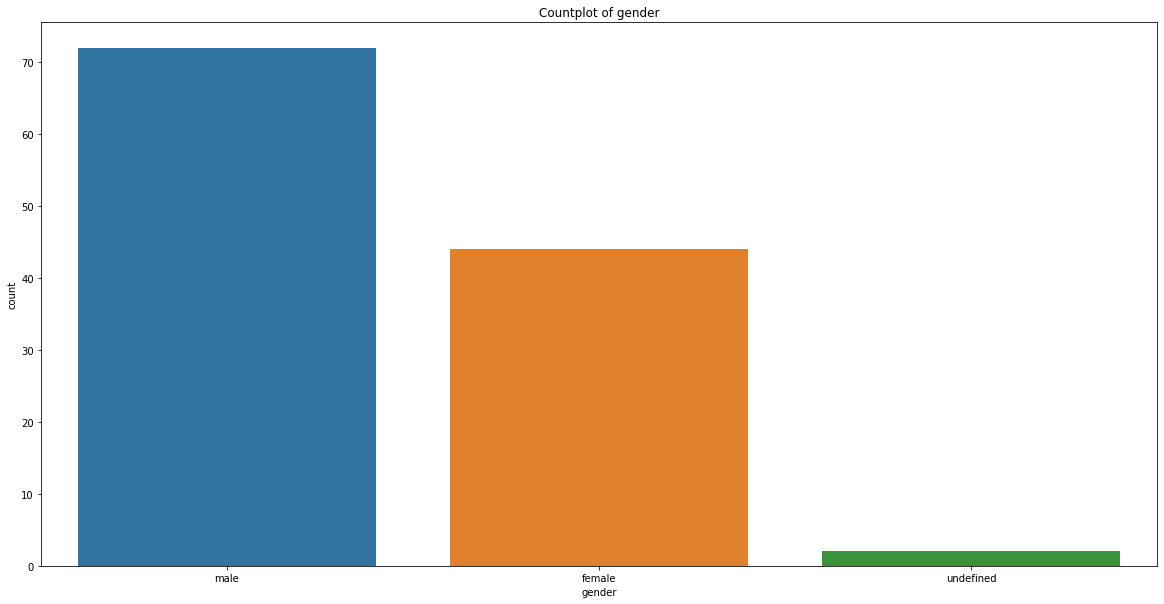

In [21]:
plt.figure(figsize=(20, 10)) 
sns.countplot(x = user_data.gender)
plt.title('Countplot of gender')
plt.show()

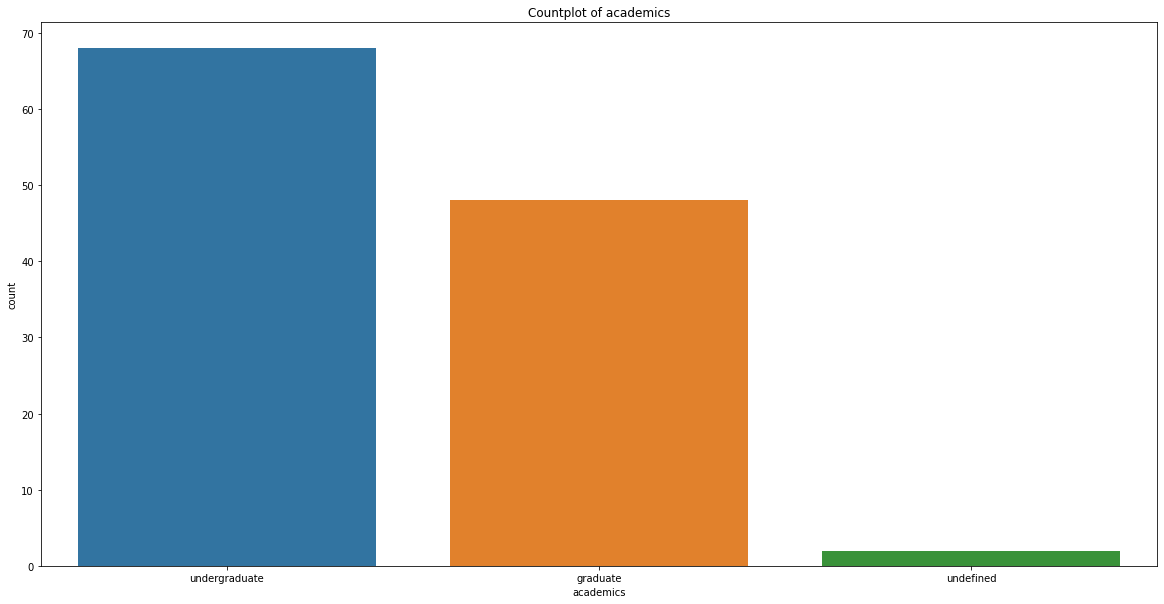

In [22]:
plt.figure(figsize=(20, 10)) 
sns.countplot(x = user_data.academics)
plt.title('Countplot of academics')
plt.show()

## Post - Data EDA

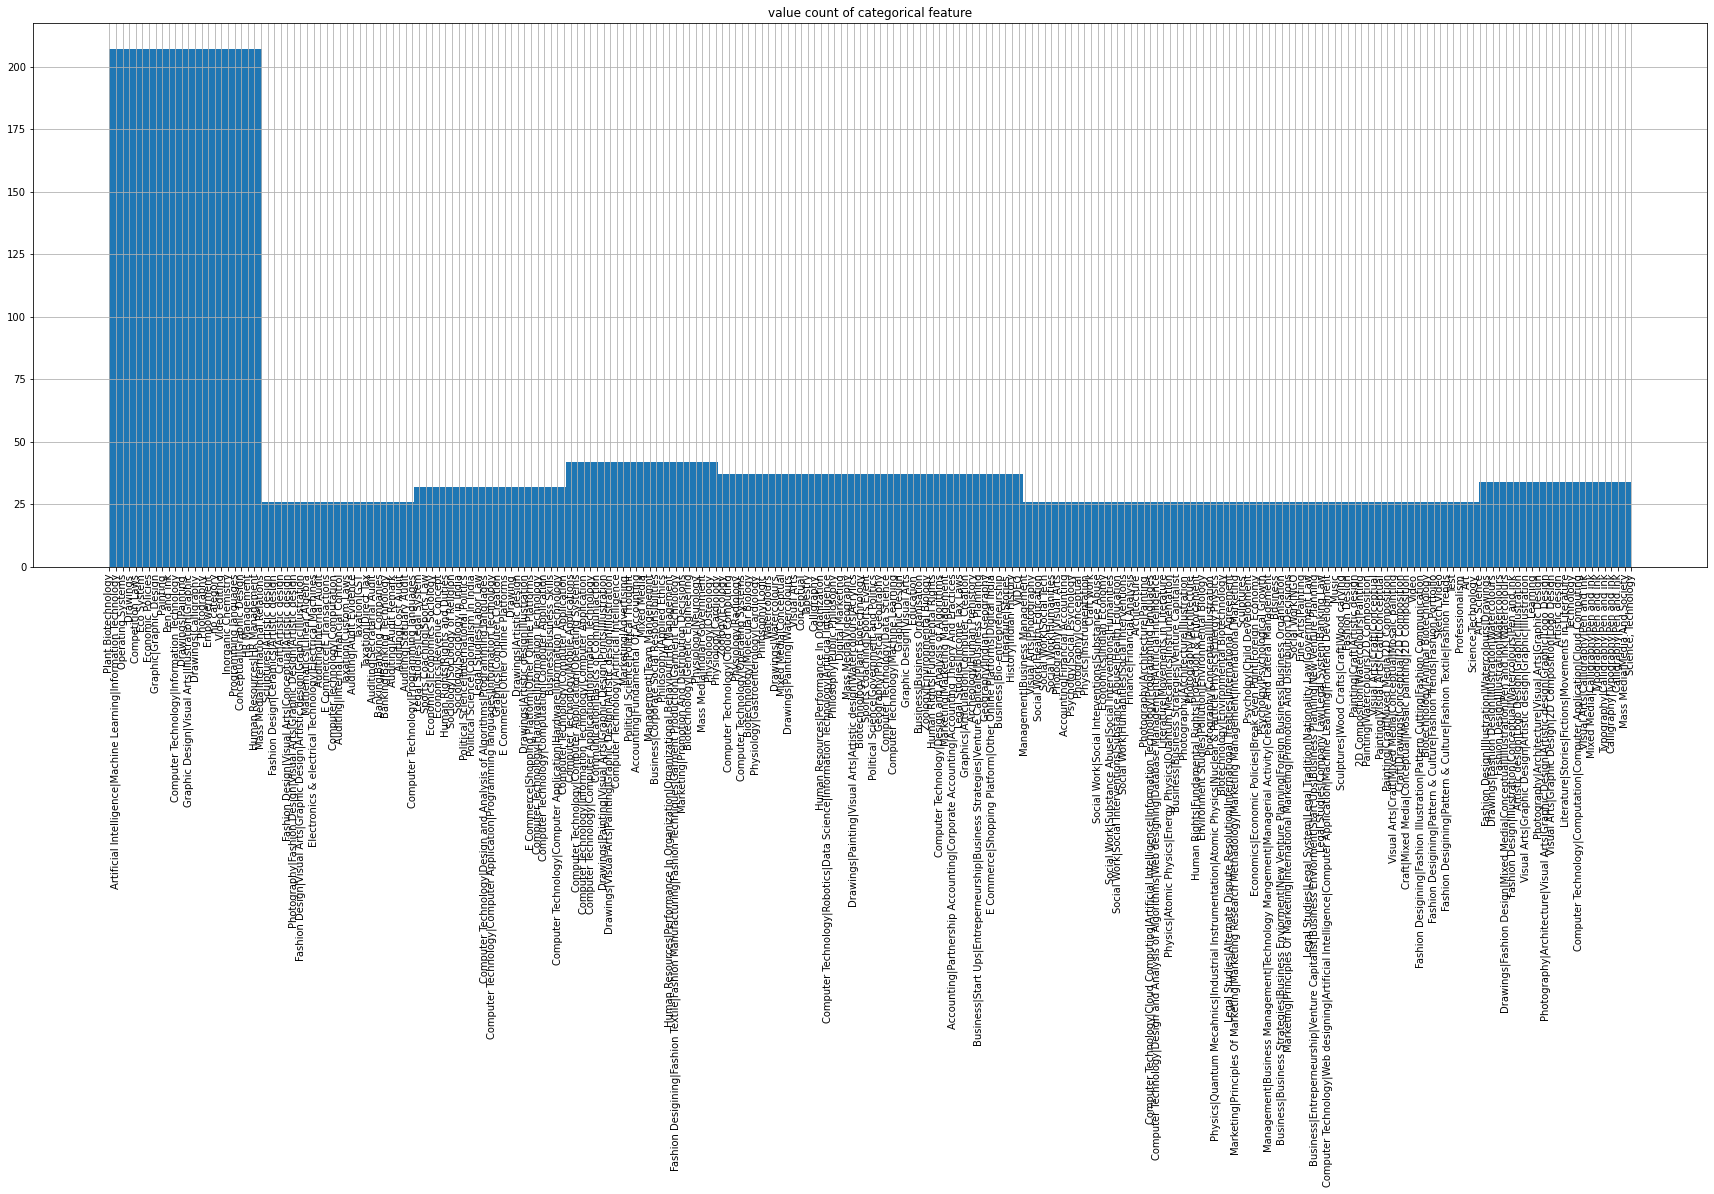

In [23]:
plt.figure(figsize=(30, 10)) 
post_data['category'].hist()
plt.title('value count of categorical feature')
plt.xticks(rotation=90)
plt.show()

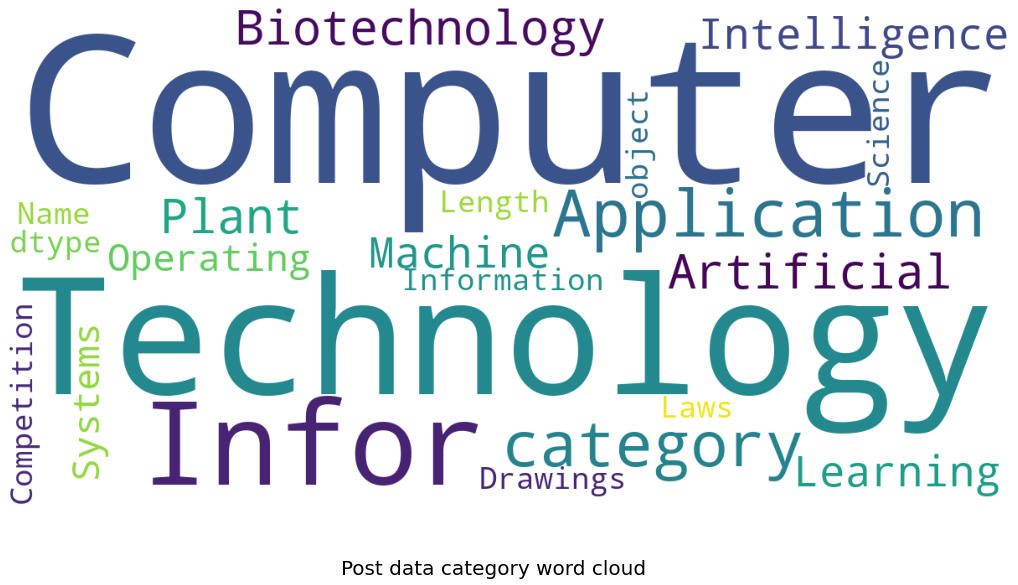

In [26]:
show_wordcloud(post_data['category'], title = 'Post data category word cloud')

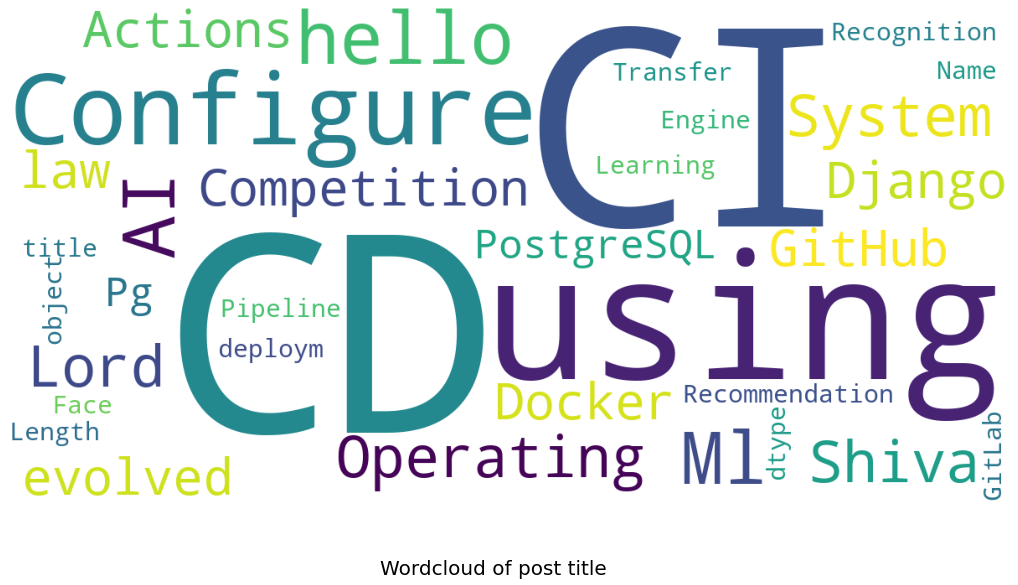

In [27]:
show_wordcloud(post_data['title'], title = 'Wordcloud of post title')

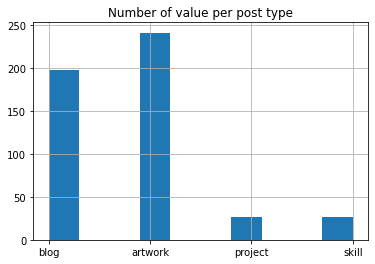

In [28]:
post_data[' post_type'].hist()
plt.title('Number of value per post type')
plt.show()

### Observation :

* We conclude from exploratory data analysis, user data contain three types of gender, majority users are male and female.And most of users are undergraduate and graduate.

* Using countplot found out major posts based on 'Plant Biotechnolog', 'AI and ML', 'Operationg System' etc. And less counts posts are 'Inorgranic chemistry', 'HR Manager', etc.

* Most frequent words in category feature are "computer", "technology", "application".

* Most frequent words in posts titles are 'django', "ci", "cd", 'system', 'law', etc.

* Major published posts are based on artwork and blog. 

##  1. recommend post to post 

### Data clearning in user data

In [29]:
# covert into lower case
user_data['name'] = user_data['name'].str.lower()
# replace "-" to '_'
user_data['name'] = user_data['name'].str.replace(" ", "_")

### Data clearning in post data

In [30]:
# convert into lower case
post_data['title'] = post_data['title'].str.lower()
# convert hindi word into english
post_data['title'] = post_data['title'].replace('आमची मुंबाई !!!', 'aamchi_mumbai')
# remove special char
post_data['title'] = post_data['title'].str.replace('[^a-z0-9]', " ")
# convert into lower case
post_data['category'] = post_data['category'].str.lower()
# replace '|' to ','
post_data['category'] = post_data['category'].str.replace("|", ',')

### Encoding Features


In [31]:
# encode post title into tfidf 
title_encoder = TfidfVectorizer()
title_encoder.fit(post_data['title'])

#########################################################

mlb = MultiLabelBinarizer()
mlb.fit(post_data['category'])
category_encode  = mlb.transform(post_data['category'])

#########################################################

# seprate each multilabel into single label as unique colums
#mlb = MultiLabelBinarizer()
#df = post_data.join(pd.DataFrame(mlb.fit_transform(post_data['category'].str.split(',')),
#                          columns = mlb.classes_,
#                          index = post_data.index))

In [32]:
category_encode

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0]])

### Avg w2v in feature

In [34]:
with open('glove_vectors', 'rb') as f :
    glove_words = pickle.load(f)

In [35]:
def avg_w2v(data, title_tfidf = title_encoder) :
    
    '''
    input --   data in pandas form and contain title columns(str)
               
            
    process -- split each words and get tf-idf value of words,
               get 300 dim vector of words from glove model then multiply both and get 300 dim vector
               
    return -- return array with shape (data size, 300 dim)
    
    '''
    
    # converting a dictionary with word as a key, and the idf as a value
    dictionary = dict(zip(title_tfidf.get_feature_names(), list(title_tfidf.idf_)))
    # all feature names
    tfidf_names = set(title_tfidf.get_feature_names())
    
    tfidf_w2v_vectors_test = np.zeros(shape = (data.shape[0], 300))
    i = 0
    
    for sentence in (data):
        # 300 dim matrix
        w2v_tfidf = np.zeros(300)
        ifidf =0
        for word in sentence.split():
        
            # check words are present in glove model and tfidf model
            if word in glove_words and word in tfidf_names :
            
                # get 300 vector
                vector = glove_words[word]        
            
                idf = dictionary[word] * (sentence.count(word) / len(sentence.split()))
            
                # multiply 300 dim vector and idf values
                w2v_tfidf += (vector * idf)
            
                ifidf += idf
    
        # avg tfidf value with w2v values
        if ifidf != 0:
            w2v_tfidf /= ifidf
        tfidf_w2v_vectors_test[i] = w2v_tfidf.reshape(1,-1)
        i += 1
        
    return tfidf_w2v_vectors_test

In [36]:
avg_w2v(post_data['title'][:1]).shape

(1, 300)

In [37]:
# convert avg w2v and tfidf list into array with coo matrix

tfidf_w2v_vectors_test = avg_w2v(post_data['title'].values)
tfidf_w2v_vectors = np.array(tfidf_w2v_vectors_test)
tfidf_w2v_vectors = coo_matrix(tfidf_w2v_vectors)

tfidf_w2v_vectors.shape

(493, 300)

In [38]:
# combine category features and 300 avg-w2v with tfidf 

combine_post = hstack((category_encode,tfidf_w2v_vectors)).tocsr()
combine_post.shape

(493, 331)

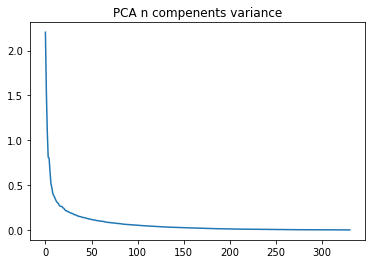

In [39]:
from sklearn.decomposition import PCA

# pca to reduce dim.
pca_demo = PCA(n_components = combine_post.shape[1])
pca_demo.fit(combine_post.toarray())

cumsum = pca_demo.explained_variance_
plt.plot(cumsum)
plt.title('PCA n compenents variance')
plt.show()

In [40]:
pca = PCA(n_components = 75)
pca.fit(combine_post.toarray())

pca_feature = pca.transform(combine_post.toarray())

### Kmean Model 

In [79]:
clf = KMeans(n_clusters = 15)
clf.fit(pca_feature)

KMeans(n_clusters=15)

In [80]:
def recommend_for_post(test_value) :
    
    
    '''
    input   --   pandas single row with title and category columns
                 title - str, category - str
                 
    process --   test value clear convert lower case, remove spcial chr.
                 encoding features in tfidf, avgw2v-tfidf, multilabelbinary and pca
                 then predict test_value cluster
                  
    output  --   retunr pandas dataframe with similar posts (in same cluster)
    
    '''
    
    # test value clearning
    test_value['title'] = test_value['title'].lower()
    test_value['title'] = test_value['title'].replace('[^a-z0-9]', " ")
    
    test_value['category'] = test_value['category'].lower()
    test_value['category'] = test_value['category'].replace("|", ',')
    
    # test value encoding
    title = title_encoder.transform([test_value['title']])
    category = mlb.transform([test_value['category']])
    
    title = np.array([test_value['title']])
    avg_title = avg_w2v(title, title_encoder)
    avg_title = coo_matrix(avg_title)
    
    # combine features and apply pca
    combine = hstack((category, avg_title))
    pca_value = pca.transform(combine.toarray())
    
    
    # predict test value cluster
    predict = clf.predict(pca_value)
    # numbers of clusters
    clusters = clf.labels_.tolist()
    # create data frame
    t = { 'post_id' : post_data['_id'].tolist() ,'title': post_data['title'].tolist(), 'category' : post_data['category'].tolist(), 
         'Cluster': clusters}
    
    frame = pd.DataFrame(t, index = [clusters])
    
    # get dataframe value with predict clusters
    return frame[frame['Cluster'] == predict[0]]
    


In [81]:
print(post_data.iloc[30, :])
(recommend_for_post(post_data.iloc[30, :]))

_id           5df64ad1cc709107827fb3dd
title                       the chosen
category                      drawings
 post_type                     artwork
Name: 30, dtype: object


,post_id,title,category,Cluster
7,5dada798610ba040fbfdf58b,smart city,painting,7
7,5dada89b610ba040fbfdf591,kid bu,drawings,7
7,5de8d73249e8203ff9219a74,promotional video,video editing,7
7,5df64ad1cc709107827fb3dd,the chosen,drawings,7
7,5e4a3cf6f5561b1994c8e378,making of the joker sketch,drawing,7
...,...,...,...,...
7,5ec601a0f2781131cc7e522e,form of ma durga,drawings,7
7,5eca6ddbec493f4a26558a46,always remember,learning,7
7,5eca7601ec493f4a26558a62,always do right,learning,7
7,5ecfb35c76027d35905cbfbc,we can overcome these days,painting,7


In [82]:
print(post_data.iloc[251, :])
recommend_for_post(post_data.iloc[251, :])

_id           5e94827ea3258347b42f2854
title                            tower
category                   photography
 post_type                     artwork
Name: 251, dtype: object


,post_id,title,category,Cluster
2,5dc065ca24b883670268772f,colours of pushkar,photography,2
2,5e3ab644eab55d319938a72d,travelling,photography,2
2,5e7838bdcfc8b713f5ac7c99,sad songs,"philosophy,logic",2
2,5e7a633ecfc8b713f5ac7d85,designs where magic happens,calligraphy,2
2,5e7df068a3258347b42f2125,screw town,photography,2
...,...,...,...,...
2,5ecc1d4eeaff6b0c3a58a565,faith in yourself,photography,2
2,5ecce8a5eaff6b0c3a58a5e9,the waves have stood still,photography,2
2,5ecd6ba47023451e66223604,be yourself,photography,2
2,5ecdecc67023451e66223765,looking at nature through nature,photography,2


In [83]:
print(post_data.iloc[301, :])
recommend_for_post(post_data.iloc[301, :])

_id                           5e9796dba3258347b42f2b26
title         filtered busy streets   jaisalmer  raj  
category                      photography,architecture
 post_type                                     artwork
Name: 301, dtype: object


,post_id,title,category,Cluster
2,5dc065ca24b883670268772f,colours of pushkar,photography,2
2,5e3ab644eab55d319938a72d,travelling,photography,2
2,5e7838bdcfc8b713f5ac7c99,sad songs,"philosophy,logic",2
2,5e7a633ecfc8b713f5ac7d85,designs where magic happens,calligraphy,2
2,5e7df068a3258347b42f2125,screw town,photography,2
...,...,...,...,...
2,5ecc1d4eeaff6b0c3a58a565,faith in yourself,photography,2
2,5ecce8a5eaff6b0c3a58a5e9,the waves have stood still,photography,2
2,5ecd6ba47023451e66223604,be yourself,photography,2
2,5ecdecc67023451e66223765,looking at nature through nature,photography,2


In [84]:
print(post_data.iloc[170, :])
recommend_for_post(post_data.iloc[170, :])

_id                              5e7c78fdcfc8b713f5ac7daa
title                                        types of ai 
category      computer technology,artificial intelligence
 post_type                                           blog
Name: 170, dtype: object


,post_id,title,category,Cluster
1,5d6d39567fa40e1417a4931c,ml and ai,"artificial intelligence,machine learning,infor...",1
1,5dadf6ae610ba040fbfdf5c8,mis,"computer technology,information technology",1
1,5e04fb252a37d20505da2a2b,python 3 programming introduction,programming languages,1
1,5e1029f22a37d20505da2a79,chat app ui desgin,"conceptual,graphic design",1
1,5e372ee2eab55d319938a6ed,seo search engine optimization,"computer technology,computation",1
1,5e41b98eeab55d319938a82d,php variables,"computer technology,design and analysis of alg...",1
1,5e41bd7deab55d319938a839,operators in php,"computer technology,computer application,progr...",1
1,5e431bf9eab55d319938a86a,computer graphics,"graphics,computer creation",1
1,5e45ae70f5561b1994c8e320,graphical input devices,"graphics,computer creation",1
1,5e45b5c9f5561b1994c8e32d,edi electronic data interchange,"e commerce,other online platforms",1


# 2. recommend user to post

In [98]:
def recommend_for_user(user_i) :
    
    gh = view_data.groupby(['user_id'])
    post_list = gh.get_group(user_i)
    #https://stackoverflow.com/questions/38185688/select-rows-containing-certain-values-from-pandas-dataframe
    test_value = post_data[np.isin(post_data, post_list).any(axis=1)]
    
    # test value clearning
    test_value['title'] = test_value['title'].str.lower()
    test_value['title'] = test_value['title'].str.replace('[^a-z0-9]', " ")
    
    test_value['category'] = test_value['category'].str.lower()
    test_value['category'] = test_value['category'].str.replace("|", ',')
    
    # test value encoding
    title = title_encoder.transform(test_value['title'])
    category = mlb.transform(test_value['category'])
    
    avg_title = avg_w2v(test_value['title'])
    avg_title = coo_matrix(avg_title)
    
    # combine features and apply pca
    combine = hstack((category, avg_title))
    pca_value = pca.transform(combine.toarray())

    # predict test value cluster
    predict = clf.predict(pca_value)
    #print(predict)
    # numbers of clusters
    clusters = clf.labels_.tolist()
    # create data frame
    t = { 'post_id' : post_data['_id'].tolist() ,'title': post_data['title'].tolist(), 'category' : post_data['category'].tolist(), 
     'Cluster': clusters}
    
    frame = pd.DataFrame(t, index = [clusters])
    
    return frame.loc[frame['Cluster'].isin(predict)]

In [86]:
u = '5ed3e898bd514d602c1530de'
gh = view_data.groupby(['user_id'])
post_list = gh.get_group(u)
test_value = post_data[np.isin(post_data, post_list).any(axis=1)]
test_value.head()

,_id,title,category,post_type
454,5ecf818376027d35905cbf03,gan s introduction,"computer technology,machine learning",blog


In [87]:
recommend_for_user(u)

,post_id,title,category,Cluster
1,5d6d39567fa40e1417a4931c,ml and ai,"artificial intelligence,machine learning,infor...",1
1,5dadf6ae610ba040fbfdf5c8,mis,"computer technology,information technology",1
1,5e04fb252a37d20505da2a2b,python 3 programming introduction,programming languages,1
1,5e1029f22a37d20505da2a79,chat app ui desgin,"conceptual,graphic design",1
1,5e372ee2eab55d319938a6ed,seo search engine optimization,"computer technology,computation",1
1,5e41b98eeab55d319938a82d,php variables,"computer technology,design and analysis of alg...",1
1,5e41bd7deab55d319938a839,operators in php,"computer technology,computer application,progr...",1
1,5e431bf9eab55d319938a86a,computer graphics,"graphics,computer creation",1
1,5e45ae70f5561b1994c8e320,graphical input devices,"graphics,computer creation",1
1,5e45b5c9f5561b1994c8e32d,edi electronic data interchange,"e commerce,other online platforms",1


In [88]:
u = '5ed3748576027d35905ccaab'
gh = view_data.groupby(['user_id'])
post_list = gh.get_group(u)
test_value = post_data[np.isin(post_data, post_list).any(axis=1)]
test_value.head()

,_id,title,category,post_type
408,5eb7b10ffd92f539c465ddda,the tree,photography,artwork
488,5ed3791976027d35905ccab6,ci cd using github actions,"computer technology,information technology",blog
489,5ed3820f76027d35905ccac8,configure docker with django postgresql pg a...,"computer technology,computer application,infor...",blog
492,5ed4cbadbd514d602c1531a6,configure ci cd pipeline in gitlab and deploym...,"computer technology,computer application,infor...",blog


In [89]:
recommend_for_user(u)

,post_id,title,category,Cluster
1,5d6d39567fa40e1417a4931c,ml and ai,"artificial intelligence,machine learning,infor...",1
1,5dadf6ae610ba040fbfdf5c8,mis,"computer technology,information technology",1
2,5dc065ca24b883670268772f,colours of pushkar,photography,2
1,5e04fb252a37d20505da2a2b,python 3 programming introduction,programming languages,1
1,5e1029f22a37d20505da2a79,chat app ui desgin,"conceptual,graphic design",1
...,...,...,...,...
1,5ed229d976027d35905cc666,cloud computing,"computer technology,computation,computer appli...",1
1,5ed2502b76027d35905cc7db,learning,"computer technology,machine learning",1
1,5ed3791976027d35905ccab6,ci cd using github actions,"computer technology,information technology",1
1,5ed3820f76027d35905ccac8,configure docker with django postgresql pg a...,"computer technology,computer application,infor...",1


In [90]:
u = '5e4195c3eab55d319938a82c'
gh = view_data.groupby(['user_id'])
post_list = gh.get_group(u)
test_value = post_data[np.isin(post_data, post_list).any(axis=1)]
test_value.head()

,_id,title,category,post_type
23,5dde6a91369b28584ecca156,spirituality,photography,artwork
227,5e8c2d01a3258347b42f2627,even and odd numbers php,no category,project
353,5ea5ce9310426255a7aa9b8d,photography,no category,project
393,5eb1ac4510426255a7aaa024,e book,video,skill
395,5eb2c11210426255a7aaa052,gangster style,drawings,artwork


In [91]:
recommend_for_user(u)

,post_id,title,category,Cluster
4,5d62abaa65218653a132c956,hello there,plant biotechnology,4
4,5d7d23315720533e15c3b1ee,what is an operating system,operating systems,4
4,5d80ecfd6c53455f896e601a,let s discuss some case laws,competition laws,4
7,5dada798610ba040fbfdf58b,smart city,painting,7
7,5dada89b610ba040fbfdf591,kid bu,drawings,7
...,...,...,...,...
4,5ed23c8676027d35905cc780,change,"calligraphy,pen and ink",4
8,5ed23cb876027d35905cc788,fear,"typography,calligraphy,pen and ink",8
9,5ed3476576027d35905cca1d,aws cli setup in mac,technology,9
9,5ed3ef4cbd514d602c1530f2,recommendation engine,no category,9


In [96]:
u = '5d90fc1a641ef364939fb6cc'
gh = view_data.groupby(['user_id'])
post_list = gh.get_group(u)
test_value = post_data[np.isin(post_data, post_list).any(axis=1)]
test_value.head()

,_id,title,category,post_type
8,5d9b3514979d5962253c2f90,biodiversity,eco system,blog


In [97]:
recommend_for_user(u)

,post_id,title,category,Cluster
3,5d80dfbc6c53455f896e600e,how competition law evolved,competition laws,3
3,5d80e7c16c53455f896e6014,raghavan committee 2002,competition laws,3
3,5d81323a6c53455f896e6044,forms of cartel,competition laws,3
3,5d9b3514979d5962253c2f90,biodiversity,eco system,3
3,5d9b950768671220a1b2b153,economic policy,economic policies,3
...,...,...,...,...
3,5ec8204cec493f4a26558893,art expo 2020,"artistic design,logo design,graphic,illustration",3
3,5ed0007a76027d35905cc0ea,a solar powered microbrewery has design led en...,artistic design,3
3,5ed23cf876027d35905cc790,risk,"calligraphy,typography,pen and ink",3
3,5ed23d4276027d35905cc798,energy,"calligraphy,typography,pen and ink",3


# Summary :

1. After data clearning, encode category feature into multilabelbinary, encode title feature into tfidf average with w2v.

2. Reduce dimension of dataset because kmean method suffer curse of dimensionality.

3. Kmean cluster set using elow method.